<a href="https://colab.research.google.com/github/vishnupm-22/Breast_Cancer_Disease_Prediction/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

**Data Collection** : loading the data from sklearn.datsets

In [ ]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

loading the data to a data frame

In [ ]:
breast_cancer_data = pd.DataFrame(breast_cancer_dataset.data,columns=breast_cancer_dataset.feature_names)

In [ ]:
breast_cancer_data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


Adding the target colm to data frame


In [ ]:
breast_cancer_data['label'] = breast_cancer_dataset.target

In [ ]:
breast_cancer_data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


Data set contains 31 features

In [ ]:
breast_cancer_data.shape

(569, 31)

**info()** gives info about non-null count and type of data

In [ ]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Checking Missing values : No Missing Values

In [ ]:
breast_cancer_data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

**describe()** : give info about Statistical Measures about the data

In [ ]:
breast_cancer_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


**EDA**


**Target Distribution** :

* bar and pie plot : data is sort of balanced . Benign(Cancer) cases are more than malignant(Non Cancer)

In [ ]:
breast_cancer_data['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

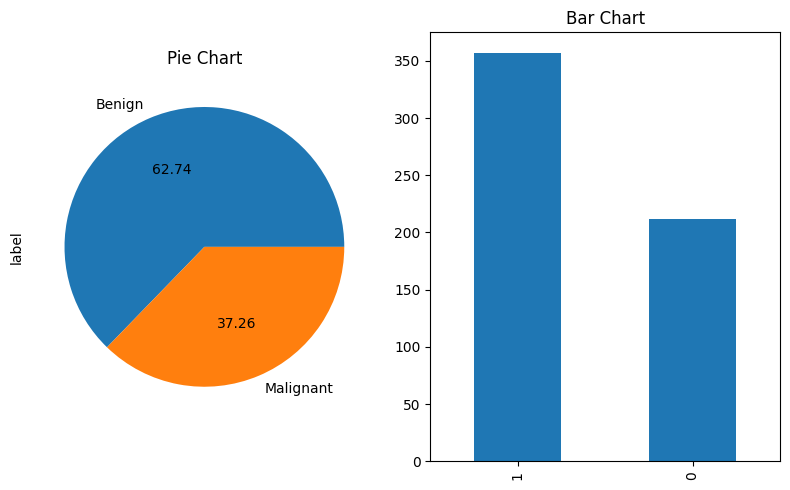

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(8,5))
breast_cancer_data['label'].value_counts().plot(kind = 'bar',ax=axs[1])
axs[1].set_title('Bar Chart')
breast_cancer_data['label'].value_counts().plot(kind = 'pie',labels=['Benign','Malignant'],autopct="%0.2f",ax=axs[0])
axs[0].set_title('Pie Chart')
plt.tight_layout()
plt.show()

**Correlation Analysis**:
* ***heatmap*** :
     * Many Features are highly correlated.High correlation might indicate multicollinearity.
     * PCA (Principal Component Analysis) is a technique commonly used to address the issue of highly correlated features.



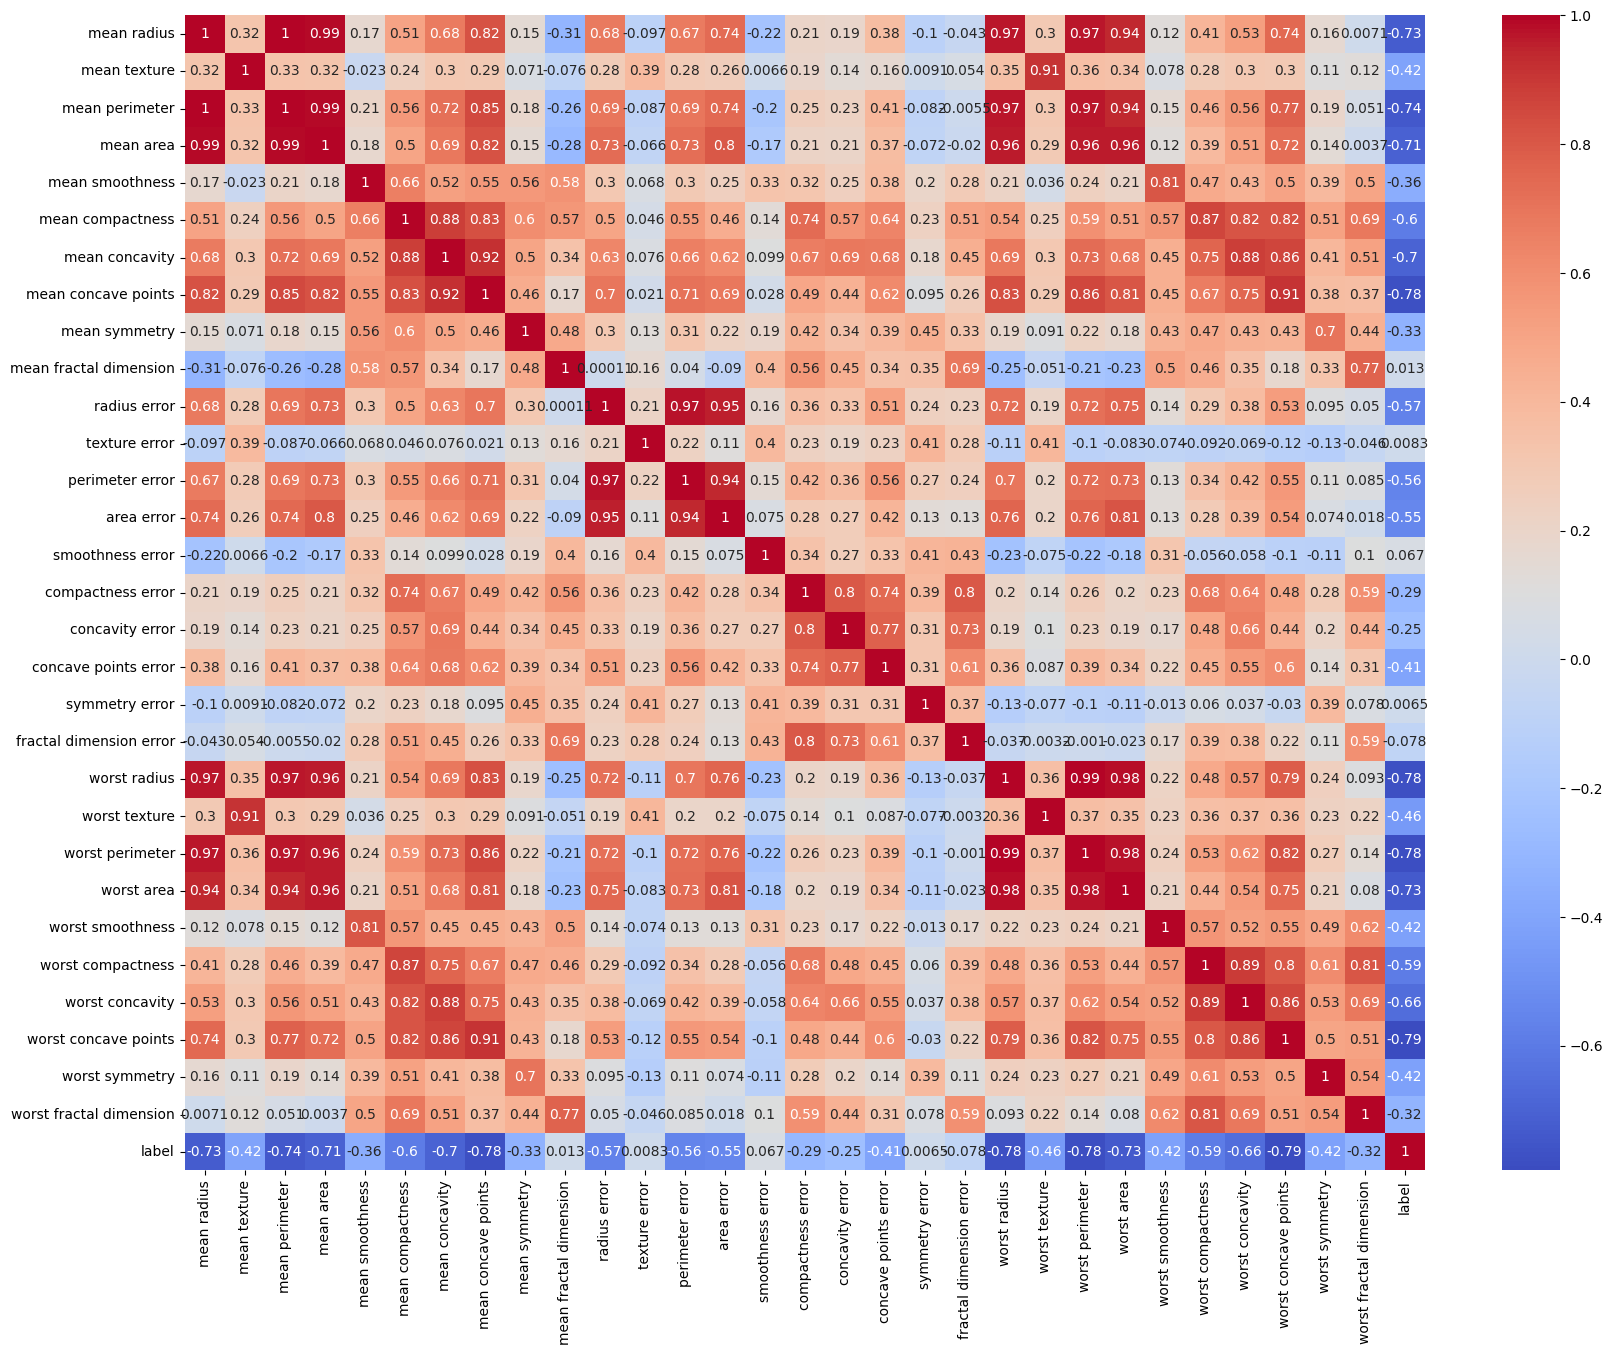

In [ ]:
import seaborn as sns
correlation_matrix = breast_cancer_data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

**Feature Distribution**:
 * Looking for features where the distributions for the two classes have minimal overlap. Features that clearly separate the classes are likely to be more informative for classification.
 * Visualizing by using dist plot.
 * features like mean radius	,mean perimeter	,mean area	,mean compactness,	mean concavity,	mean concave points,perimeter error,area error ,worst perimeter,	worst area
worst compactness	worst concavity	worst concave points have min overlap .these features are more important in claasification.

<ipython-input-14-df85243d749e>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancer_data[breast_cancer_data['label'] == 0][feature], label='Malignant', shade=True, ax=axes[i])
<ipython-input-14-df85243d749e>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancer_data[breast_cancer_data['label'] == 1][feature], label='Benign', shade=True, ax=axes[i])
<ipython-input-14-df85243d749e>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancer_data[breast_cancer_data['label'] == 0][feature], label='Malignant', shade=True, ax=axes[i])
<ipython-input-14-df85243d749e>:10: FutureWarning: 

`shade` is now d

<Figure size 2000x1500 with 0 Axes>

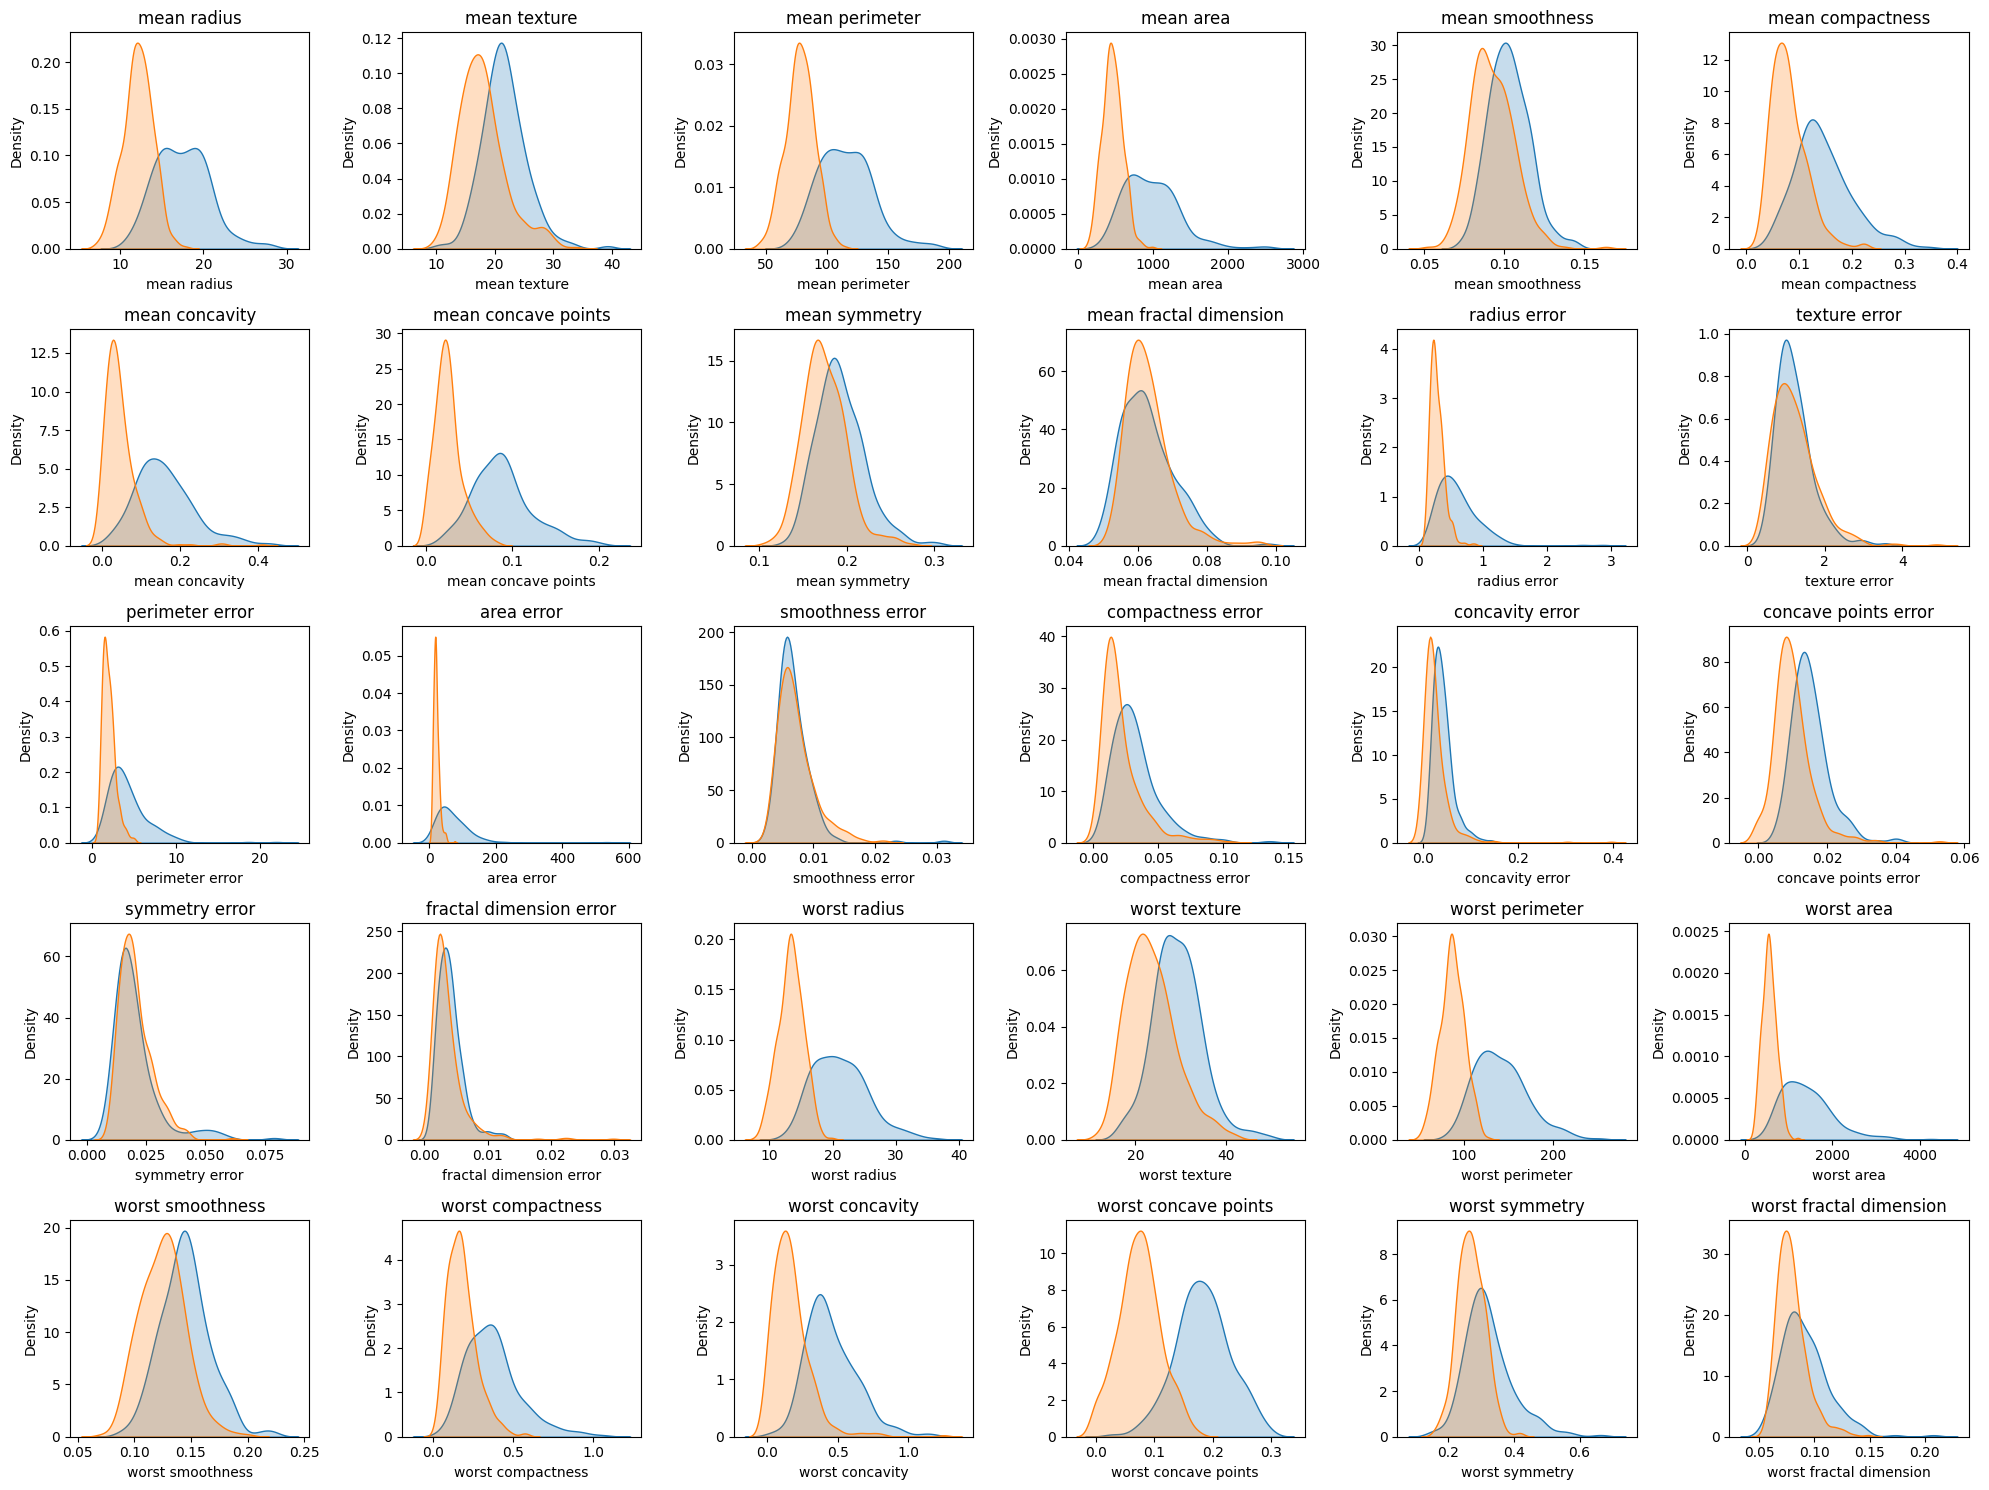

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 15))
num_rows = 5
num_cols = 6
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
axes = axes.flatten()
for i, feature in enumerate(list(breast_cancer_data.columns[0:30])):
    sns.kdeplot(breast_cancer_data[breast_cancer_data['label'] == 0][feature], label='Malignant', shade=True, ax=axes[i])
    sns.kdeplot(breast_cancer_data[breast_cancer_data['label'] == 1][feature], label='Benign', shade=True, ax=axes[i])
    axes[i].set_title(feature)
plt.tight_layout()
plt.show()


In [ ]:
breast_cancer_data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


**Outlier detection** : Box plot : there are outliers in the data

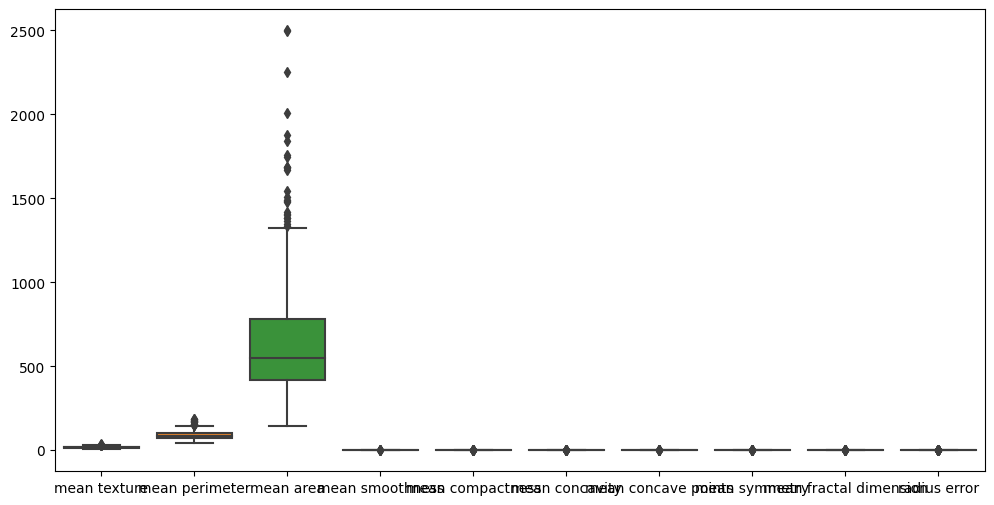

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=breast_cancer_data.iloc[:, 1:11])
plt.show()

**Handling Outliers** : by Winsorization method

In [ ]:
import pandas as pd
from scipy.stats.mstats import winsorize
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame
# Create a new DataFrame for Winsorized data
df_winsorized = breast_cancer_data.copy()
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label']
for i in features:


  # Winsorize the feature and store it in the new DataFrame
  df_winsorized[i] = winsorize(df_winsorized[i], limits=[0.05, 0.05])

  # Visualize the original and Winsorized data
  plt.figure(figsize=(3, 3))

  # Original data
  plt.subplot(1, 2, 1)
  sns.boxplot(x=breast_cancer_data[i])
  plt.title('Original Data')

  # Winsorized data
  plt.subplot(1, 2, 2)
  sns.boxplot(x=df_winsorized[i])
  plt.title('Winsorized Data')

  plt.show()


separating the features and target column

In [ ]:
X = df_winsorized.drop(columns='label',axis=1)
Y = df_winsorized['label']

In [ ]:
df_winsorized.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [ ]:
df_winsorized.sample(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
214,14.19,23.81,92.87,610.7,0.09463,0.1306,0.1115,0.06462,0.2235,0.06433,...,34.85,115.0,811.3,0.1559,0.4059,0.3744,0.1772,0.4066,0.1026,0


**Applying PCA** : PCA is commonly applied to reduce the number of features while retaining the most important information in the data.

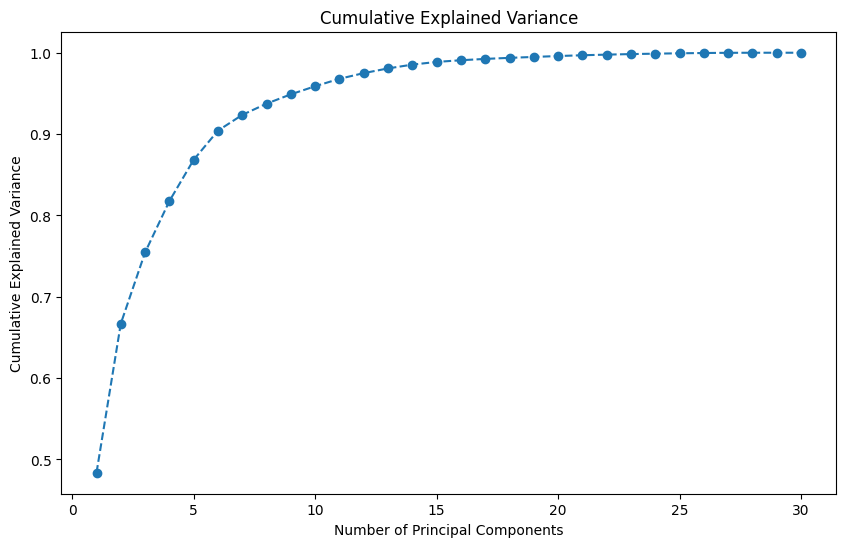

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


plotting graph between 'No of pca components' and 'Cummulative Explained Variance' : choosing n at 95 % or 99 % cumm var .

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Choose the number of components based on your analysis
n_components = 15

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame from the PCA-transformed data
columns = [f"PC{i+1}" for i in range(n_components)]
X_pca_df = pd.DataFrame(data=X_pca, columns=columns)

# Display the first few rows of the DataFrame
print(X_pca_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.554914  0.577539 -0.323072  0.937437 -0.322816  0.396640 -0.560717   
1  0.882915 -1.220114 -0.168504  0.356696  0.045055 -0.010035 -0.201223   
2  1.935773 -0.301067 -0.096141  0.322343 -0.152249  0.191528  0.109836   
3  1.381163  1.918945 -0.293870 -0.023626 -0.059892  0.359684  0.129557   
4  1.406643 -0.554061  0.327964  1.036439  0.052950 -0.458861  0.147753   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.045683 -0.030267 -0.240328 -0.228690  0.127142  0.005859  0.073866   
1 -0.167899  0.252688  0.313569 -0.140636 -0.246424  0.272145 -0.152421   
2 -0.039633 -0.011961  0.040452  0.198339 -0.202363  0.027107 -0.032322   
3 -0.098314 -0.051878 -0.230837  0.151267  0.004178  0.120690  0.097605   
4 -0.270156  0.059761  0.279017 -0.086690  0.197029  0.187717 -0.050882   

       PC15  
0 -0.049987  
1 -0.105091  
2  0.147008  
3  0.338796  
4  0.000148  


In [ ]:
X_pca[0]

array([ 2.554914  ,  0.57753934, -0.32307214,  0.93743728, -0.32281602,
        0.39663955, -0.56071702, -0.04568262, -0.03026719, -0.24032776,
       -0.22869008,  0.12714219,  0.00585917,  0.07386568, -0.04998665])

It transforms the original features into a new set of uncorrelated features called principal components

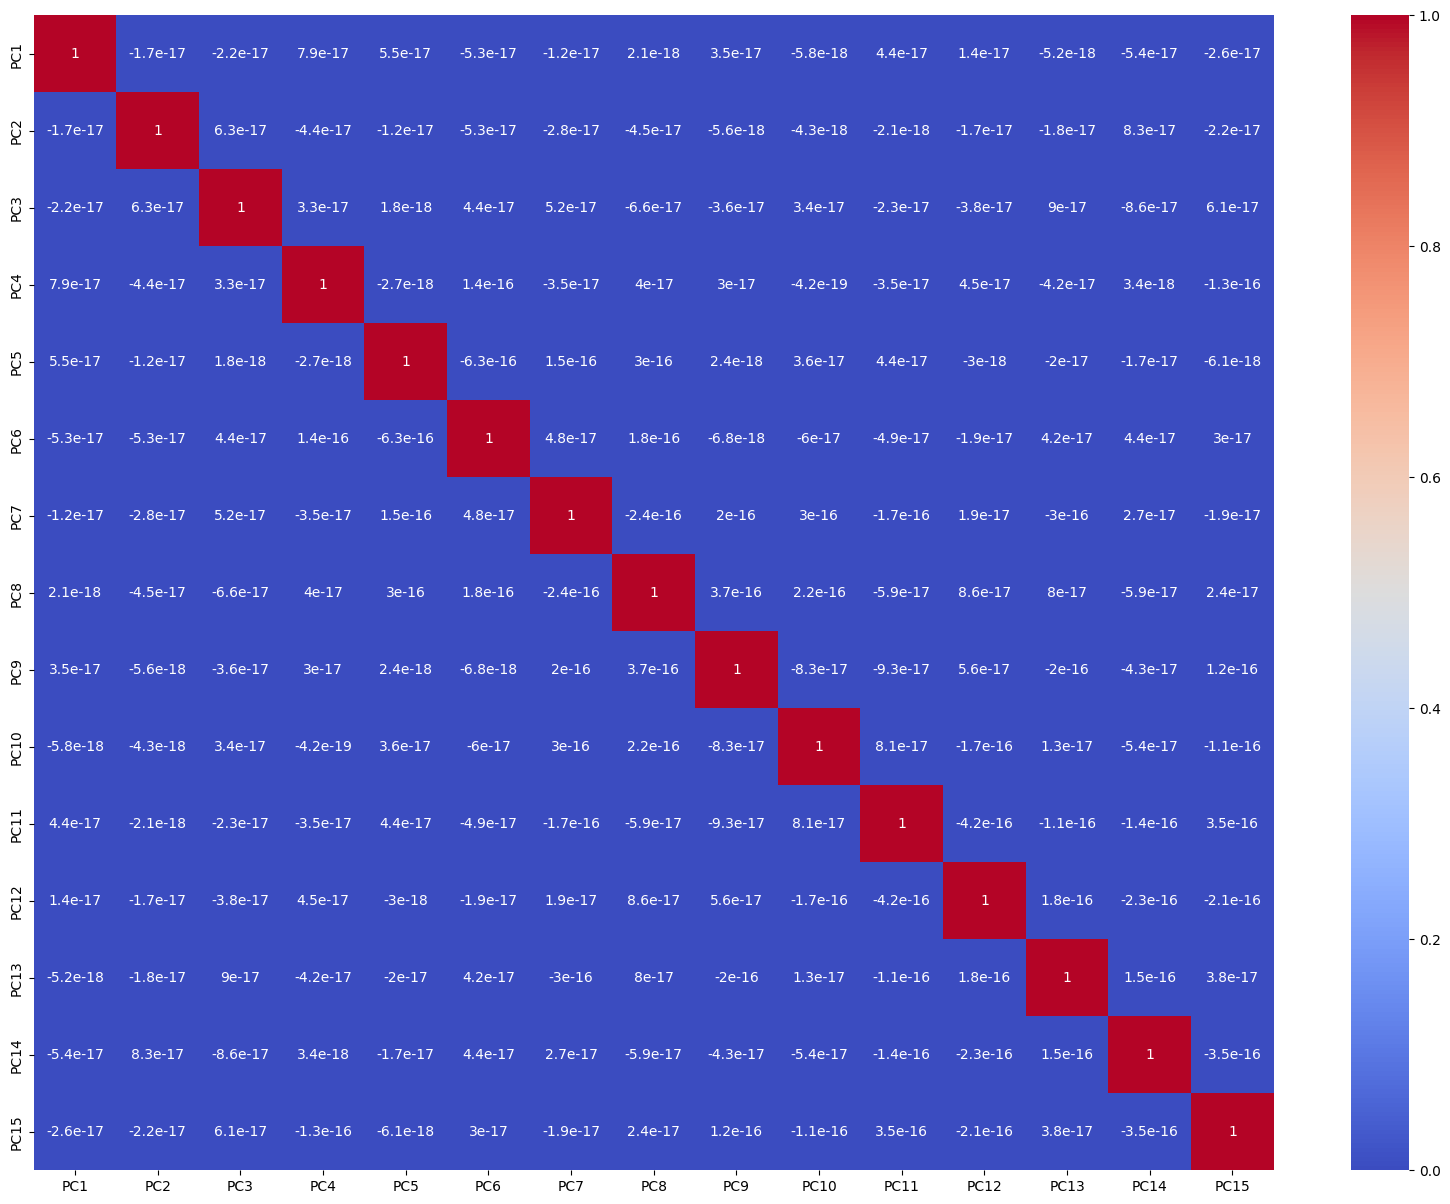

In [ ]:
import seaborn as sns
correlation_matrix = X_pca_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

##**MODEL**
  * Building the neural network
  * Setting up the layers of NN
  *  Compiling the NN
  * Training the NN
  *  Visualizing accuracy and loss

In [ ]:
!pip install tensorflow

**Algorithm** :
  * Initialization
  * Forward Propagation
  * Loss Calculation
  * Backpropagation
  * Gradient Descent Optimization
  * Repeat
  * Validation and Testing
  * Prediction







**Building the simple neural network Architecture**
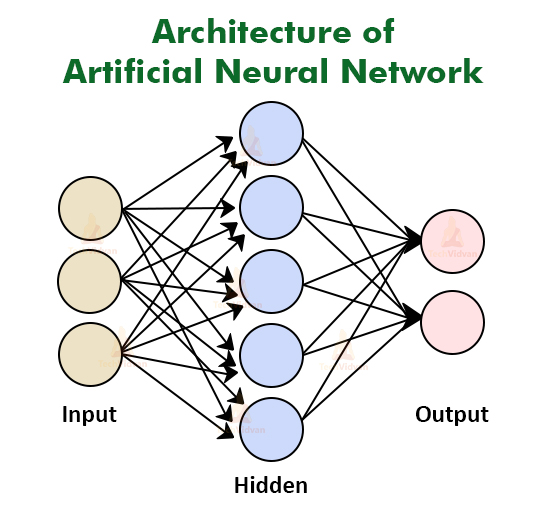

* simple 3 layer NN
* 1st layer : input layer
* 2nd layer : hidden layer
* 3rd layer : output layer

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
model = keras.Sequential([
                         keras.layers.Flatten(input_shape=(15,)),
                         keras.layers.Dense(20,activation='relu'),
                         keras.layers.Dense(2,activation='sigmoid')
])

**Compiling the NN**

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Training the NN**

In [ ]:
history = model.fit(X_train,Y_train,validation_split=0.1,epochs=50)

Epoch 1/50
13/13 [==============================] - 1s 23ms/step - loss: 0.6193 - accuracy: 0.6504 - val_loss: 0.5947 - val_accuracy: 0.7174
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.5736 - accuracy: 0.7286 - val_loss: 0.5505 - val_accuracy: 0.7609
Epoch 3/50
13/13 [==============================] - 0s 7ms/step - loss: 0.5326 - accuracy: 0.8166 - val_loss: 0.5095 - val_accuracy: 0.8043
Epoch 4/50
13/13 [==============================] - 0s 8ms/step - loss: 0.4940 - accuracy: 0.8778 - val_loss: 0.4715 - val_accuracy: 0.8261
Epoch 5/50
13/13 [==============================] - 0s 7ms/step - loss: 0.4590 - accuracy: 0.8924 - val_loss: 0.4356 - val_accuracy: 0.8696
Epoch 6/50
13/13 [==============================] - 0s 7ms/step - loss: 0.4251 - accuracy: 0.9291 - val_loss: 0.4048 - val_accuracy: 0.8696
Epoch 7/50
13/13 [==============================] - 0s 8ms/step - loss: 0.3936 - accuracy: 0.9340 - val_loss: 0.3753 - val_accuracy: 0.8913
Epoch 8/50
13/13 [=

**Visualizing accuracy and loss**

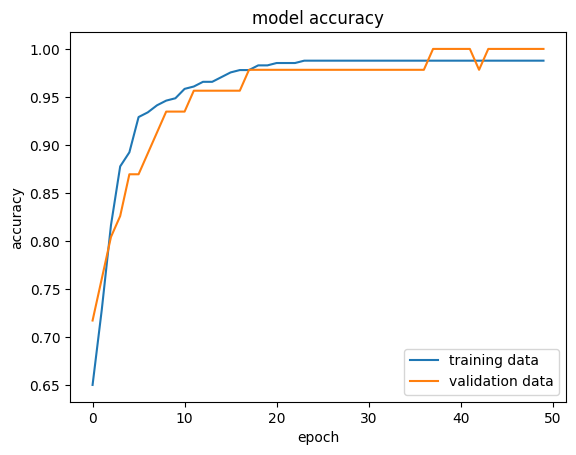

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'lower right')

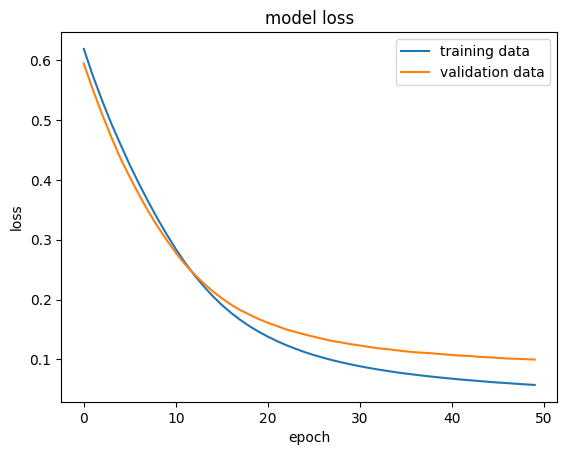

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'upper right')

Accuracy of a model on test data

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

4/4 [==============================] - 0s 8ms/step - loss: 0.0718 - accuracy: 0.9649
0.9649122953414917


In [ ]:
print(X_test.shape)
print(X_test[0])

(114, 15)
[-0.21445034  0.21944867 -0.19796607 -0.00384609 -0.14965641 -0.02490593
 -0.06746538  0.01419957 -0.14951354  0.0656742   0.01472967  0.05243605
  0.00820242 -0.0414677   0.03276426]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 0s 9ms/step


In [ ]:
Y_pred[0]

array([0.2556128 , 0.61078084], dtype=float32)

converting the prediction probability to class labels

In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]
